<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [3]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


### Data:

Import data <code>boston_data</code> from the <code>dataset</code> folder.

**Data Dictionary:**
|Variable|Description|
|---|---|
|CRIM|per capita crime rate by town|
|ZN|proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS|proportion of non-retail business acres per town|
|CHAS| Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|NOX|  nitric oxides concentration (parts per 10 million)|
|RM|   average number of rooms per dwelling|
|AGE|  proportion of owner-occupied units built prior to 1940|
|DIS|  weighted distances to five Boston employment centres|
|RAD|  index of accessibility to radial highways|
|TAX|  full-value property-tax rate per &dollar;10,000|
|PTRATIO|  pupil-teacher ratio by town|
|B|1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|LSTAT|% lower status of the population|
|MEDV| Median value of owner-occupied homes in &dollar;1000's|

Your target variable is <code>MEDV</code>.

In [5]:
#Import data boston_data from the dataset folder.
df = pd.read_csv("datasets/boston_data.csv")

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [6]:
# Check missing
missing_values = df.isnull().sum()

print("Missing values DataFrame :")
print(missing_values)

Missing values DataFrame :
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [7]:
#Check duplicate
duplicates = df[df.duplicated(keep='first')]

if not duplicates.empty:
    # If there are duplicated rows, you can either remove them or handle them as needed.
    df = df.drop_duplicates(keep='first')

    print("Duplicated rows:")
    print(duplicates)

else:
    print("No duplicated rows found.")



No duplicated rows found.


In [8]:
# Check data types
print("Current data types:")
print(df.dtypes)

Current data types:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [9]:
# check data value
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Obtain Train Score and Test Score, and interpret your model's performance.
    - is the model underfitting?
    - is the model overfitting?
- Use `seaborn jointplot` to plot your predictions against the true value.
    - You may refer to this [seaborn document](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

In [10]:
selected_features = ['CRIM', 'RM', 'TAX', 'LSTAT']
X = df[selected_features]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


Train Mean Squared Error: 27.772799923496787
Test Mean Squared Error: 31.690012987497955
Train R-squared: 0.683015714889246
Test R-squared: 0.6093934466364287


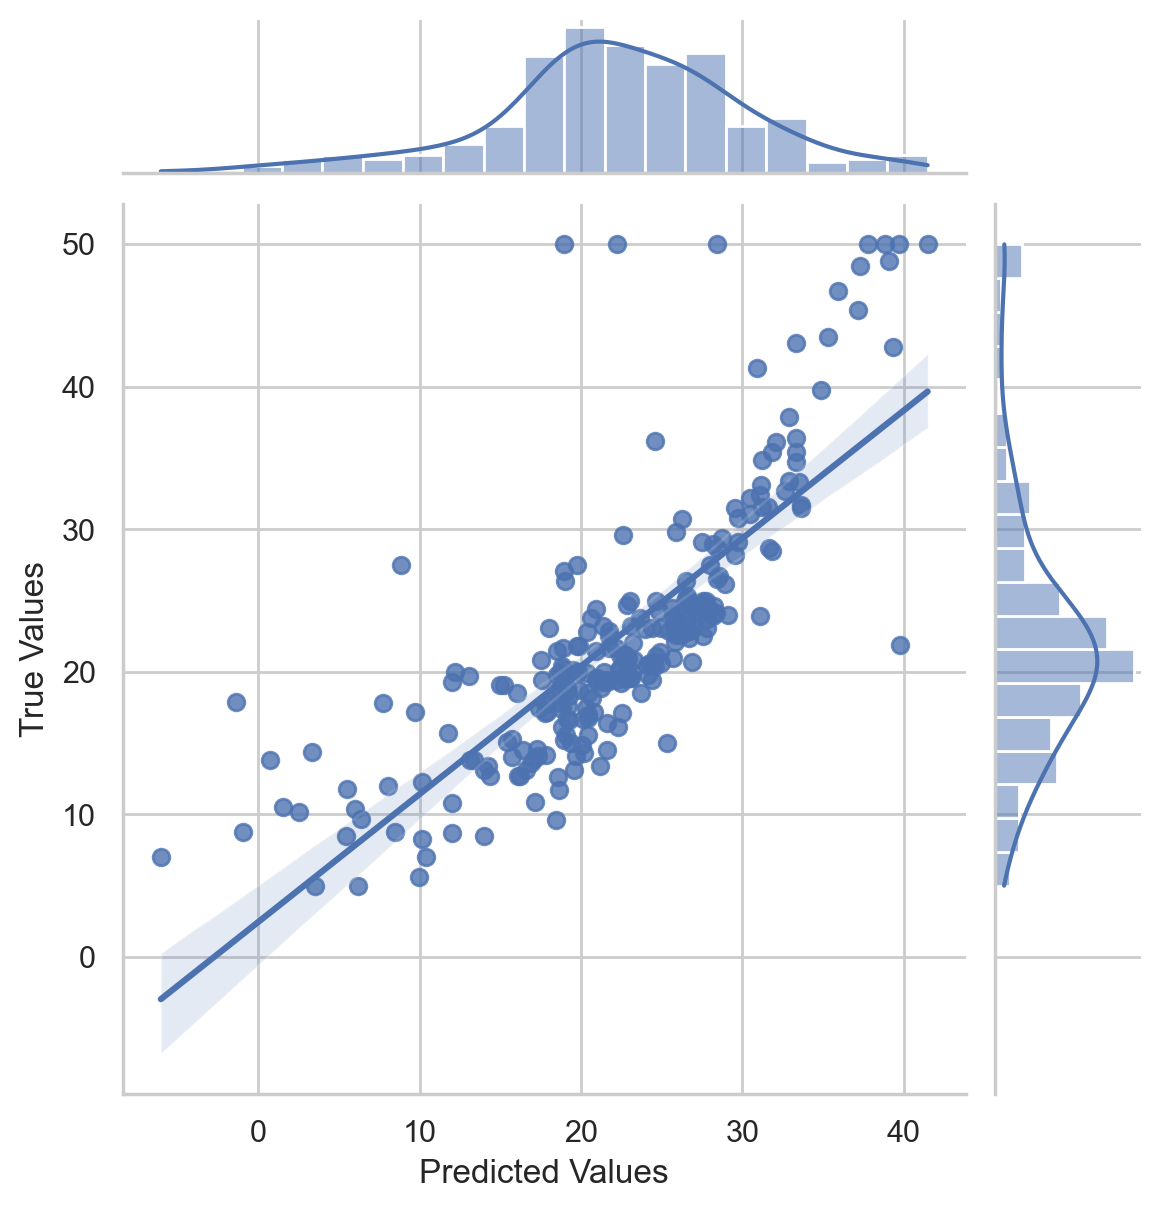

In [11]:
# Create a Linear Regression model
model = LinearRegression()

model.fit(X_train, y_train)
# Make predictions on both the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate the Mean Squared Error and R-squared for training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the train and test scores
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

# Check for underfitting or overfitting
# If the training score (R-squared) is low, it may indicate underfitting.
# If the training score is significantly higher than the test score, it may indicate overfitting.

# Create a jointplot to visualize predictions against the true values
sns.set(style="whitegrid")
g = sns.jointplot(x=test_predictions, y=y_test, kind="reg")
g.set_axis_labels("Predicted Values", "True Values")
plt.show()

**Comment here**<br>



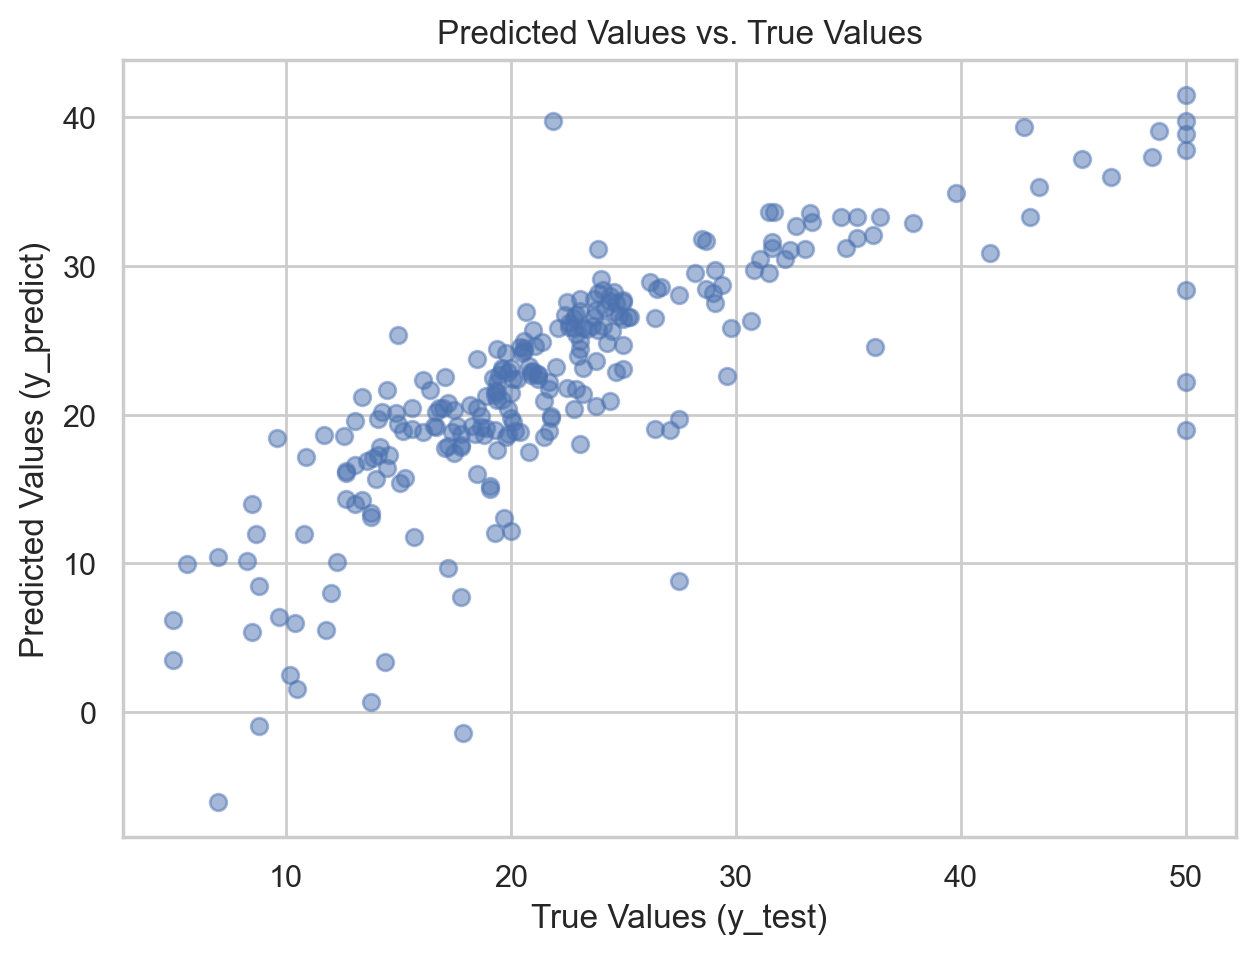

In [12]:
#plot y_predict vs y_test (your y true values)
# Plot predicted values against true values
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_predict)")
plt.title("Predicted Values vs. True Values")
plt.show()


### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [13]:
#Train-test-split with 70/30 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on both the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate the Mean Squared Error and R-squared for training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the train and test scores for the 70/30 split
print("Train Mean Squared Error (70/30):", train_mse)
print("Test Mean Squared Error (70/30):", test_mse)
print("Train R-squared (70/30):", train_r2)
print("Test R-squared (70/30):", test_r2)


Train Mean Squared Error (70/30): 29.859032225653003
Test Mean Squared Error (70/30): 29.173509761248212
Train R-squared (70/30): 0.6602933878636326
Test R-squared (70/30): 0.6084780864502297


**Comment here**<br>



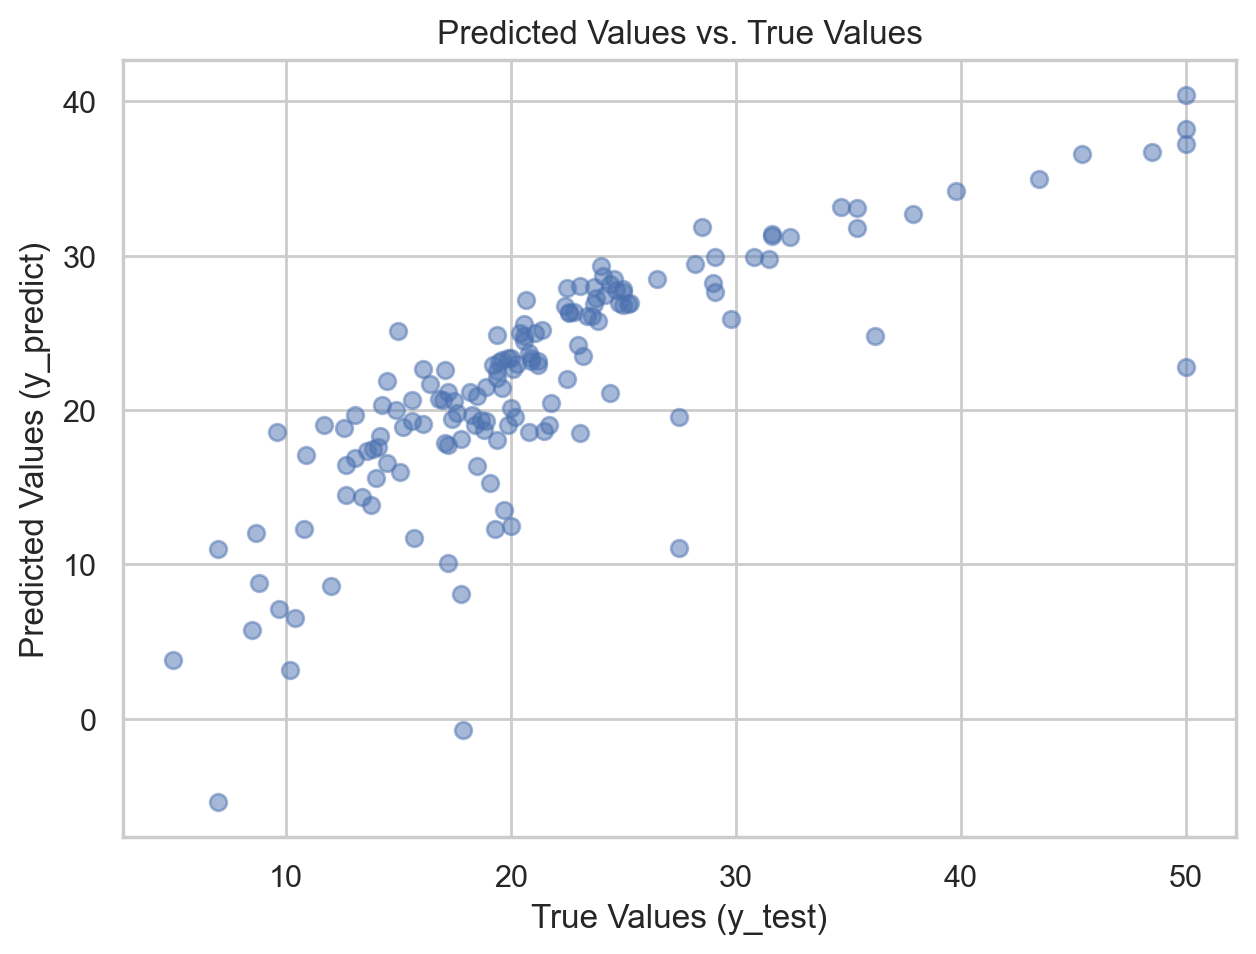

In [14]:
#plot y_predict vs y_test (your y true values)
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_predict)")
plt.title("Predicted Values vs. True Values")
plt.show()

In [15]:
#Train-test-split with 90/10 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on both the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate the Mean Squared Error and R-squared for training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Print the train and test scores for the 90/10 split
print("Train Mean Squared Error (90/10):", train_mse)
print("Test Mean Squared Error (90/10):", test_mse)
print("Train R-squared (90/10):", train_r2)
print("Test R-squared (90/10):", test_r2)

Train Mean Squared Error (90/10): 30.662936312559488
Test Mean Squared Error (90/10): 19.286942373299016
Train R-squared (90/10): 0.6460243855562214
Test R-squared (90/10): 0.6910837820663487


**Comment here**<br>



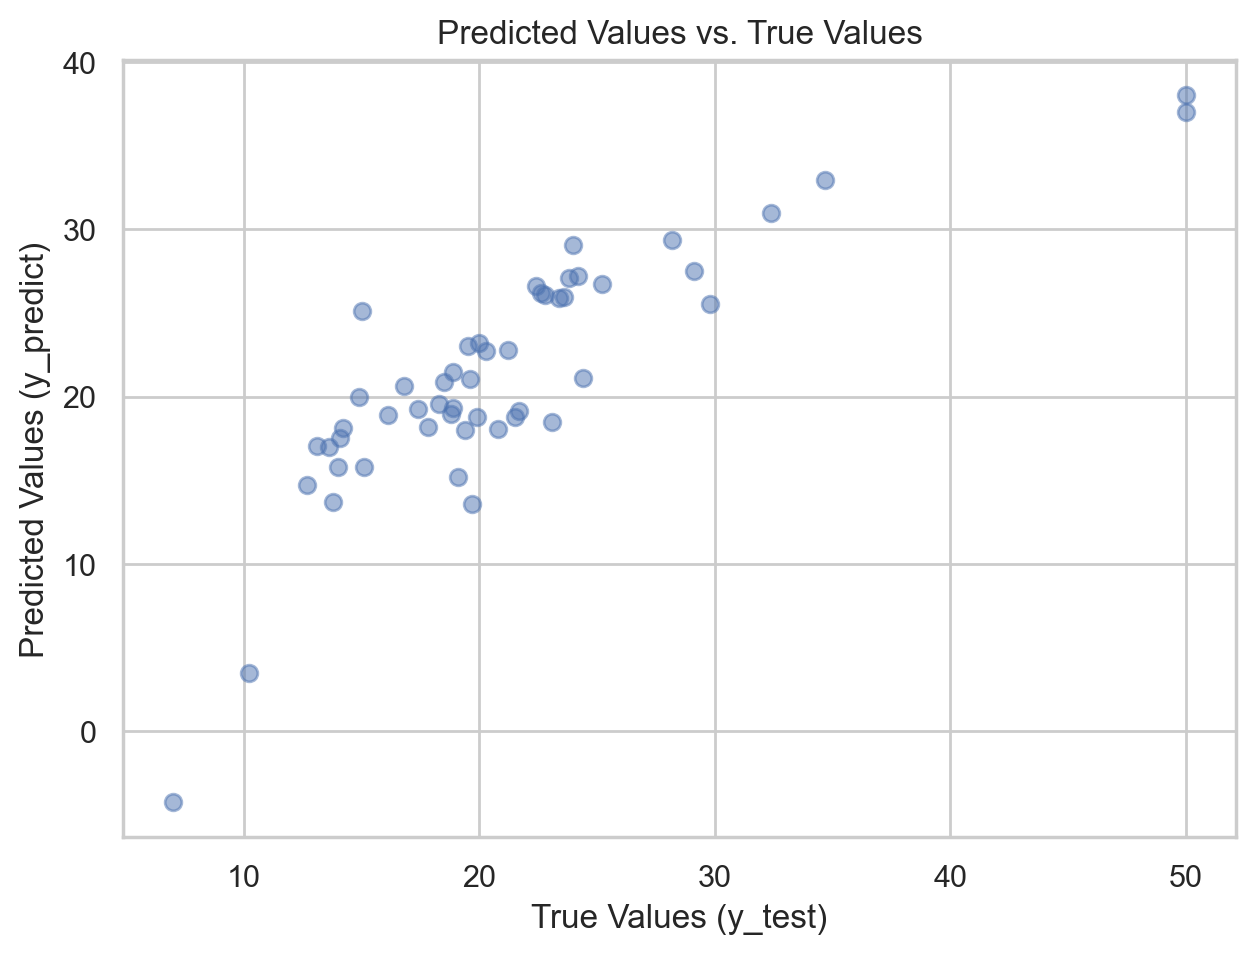

In [16]:
#plot y_predict vs y_test (your y true values)
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_predict)")
plt.title("Predicted Values vs. True Values")
plt.show()

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [17]:
# Define a range of k values (5 to 10)
k_values = range(5, 11)

# Initialize lists to store the results
mean_r2_scores = []
variance_r2_scores = []

for k in k_values:
    # Create a K-Fold cross-validator with 'k' folds
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Perform cross-validation and calculate R-squared scores
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    # Calculate mean and variance of R-squared scores
    mean_r2 = np.mean(r2_scores)
    variance_r2 = np.var(r2_scores)

    # Append results to lists
    mean_r2_scores.append(mean_r2)
    variance_r2_scores.append(variance_r2)

# Print the results
for k, mean_score, variance in zip(k_values, mean_r2_scores, variance_r2_scores):
    print(f"K-Fold = {k}: Mean R-squared = {mean_score:.4f}, Variance = {variance:.4f}")

K-Fold = 5: Mean R-squared = 0.6316, Variance = 0.0020
K-Fold = 6: Mean R-squared = 0.6356, Variance = 0.0073
K-Fold = 7: Mean R-squared = 0.6334, Variance = 0.0081
K-Fold = 8: Mean R-squared = 0.6336, Variance = 0.0087
K-Fold = 9: Mean R-squared = 0.6205, Variance = 0.0146
K-Fold = 10: Mean R-squared = 0.6327, Variance = 0.0090


### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [18]:
from itertools import combinations

### 5.1 Can you explain what could be wrong with this approach?

In [ ]:
# Even though we are cross-validating to get our R2 score for each model we're testing, 
# we're trying thousands of different models and then choosing the one that has the
# absolute highest R2.
# Cross-validation does not eliminate the fact that this is a random sample from an
# overall population, and the highest R2 out of these models is likely going to be 
# higher than the ones near it by chance. Is the model with the best R2 *REALLY* 
# better than the 2nd highest? 3rd highest?

# This is an important point: you are the researcher and you should, whenever possible,
# NOT rely on the computer's "brute force". This is why EDA is so important as well
# as domain knowledge. As a human being can we eliminate variables that we know 
# should not be used to build the model?

In [20]:
# Define the range of k for k-fold cross-validation
k_values = range(5, 11)

# Initialize variables to keep track of the best feature combination and its R-squared score
best_features = None
best_r2_score = -1

for num_features in range(1, len(selected_features) + 1):

    feature_combinations = combinations(selected_features, num_features)

    for features in feature_combinations:
        # Convert the selected feature combination to a list
        feature_list = list(features)

        # Create a new dataset with the selected features
        X_subset = X[feature_list]

        for k in k_values:
            # Create a K-Fold cross-validator with 'k' folds
            kf = KFold(n_splits=k, shuffle=True, random_state=42)

            # Initialize a Linear Regression model
            model = LinearRegression()

            # Perform cross-validation and calculate R-squared scores
            r2_scores = cross_val_score(model, X_subset, y, cv=kf, scoring='r2')

            # Calculate the mean R-squared score
            mean_r2 = np.mean(r2_scores)

            # Check if the current feature combination performs better
            if mean_r2 > best_r2_score:
                best_r2_score = mean_r2
                best_features = feature_list

# Print the best feature combination and its R-squared score
print("Best Feature Combination:", best_features)
print("Best R-squared Score:", best_r2_score)

Best Feature Combination: ['CRIM', 'RM', 'TAX', 'LSTAT']
Best R-squared Score: 0.6356056476713382


### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [21]:
import patsy
import statsmodels.api as sm

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     146.7
Date:                Fri, 20 Oct 2023   Prob (F-statistic):          5.10e-154
Time:                        16:20:38   Log-Likelihood:                 757.48
No. Observations:                 506   AIC:                            -1489.
Df Residuals:                     493   BIC:                            -1434.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7866      0.051     15.469      0.0

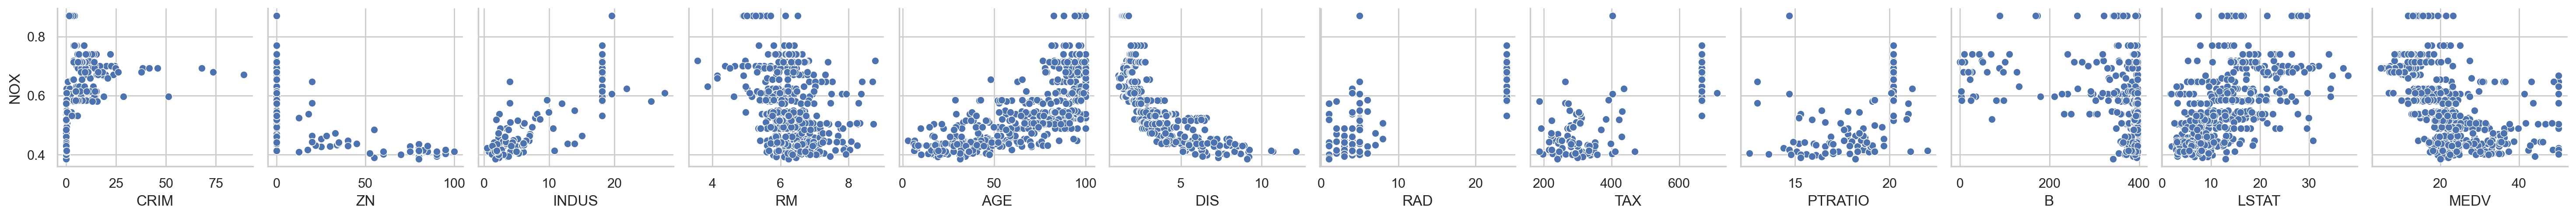

Pearson Correlation Scores:
Intercept: nan
CRIM: 0.421
ZN: -0.517
INDUS: 0.764
RM: -0.302
AGE: 0.731
DIS: -0.769
RAD: 0.611
TAX: 0.668
PTRATIO: 0.189
B: -0.380
LSTAT: 0.591
MEDV: -0.427


C:\Users\Chonn\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Chonn\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [22]:
# Define the formula for the target variable and predictors
formula = "NOX ~ CRIM + ZN + INDUS + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + MEDV"

# Create matrices from the formula
y, X = patsy.dmatrices(formula, data=df, return_type="dataframe")

# Fit a linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print summary statistics of the model
print(results.summary())

# Plot a pairplot to explore the relationships
sns.pairplot(df, x_vars=['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
             y_vars=['NOX'], kind='scatter')
plt.show()

# Calculate Pearson correlation scores between the target and predictors
correlation_scores = {}
for column in X.columns:
    correlation_scores[column] = np.corrcoef(X[column], y['NOX'])[0, 1]

# Print Pearson correlation scores
print("Pearson Correlation Scores:")
for feature, score in correlation_scores.items():
    print(f"{feature}: {score:.3f}")